In [1]:
import torch

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import time
from model import Model


In [2]:
# EXTRACT IMAGES

noisy_imgs_1 , noisy_imgs_2 = torch.load('train_data.pkl')
noisy_imgs , clean_imgs = torch.load ('val_data.pkl')

imgs_1 = noisy_imgs_1[0:10000]/255
imgs_2 = noisy_imgs_2[0:10000]/255

noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255


In [5]:
# CHECK PSNR

def psnr ( denoised , ground_truth ) :
        # Peak Signal to Noise Ratio : denoised and ground_truth have range [0 , 1]
        mse = torch.mean (( denoised - ground_truth ) ** 2)
        return -10 * torch.log10 ( mse + 10** -8)

In [4]:

model = Model()

model.train(imgs_1, imgs_2)


/Users/antoine/opt/anaconda3/envs/deep_learning_env/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 0.752284862101078
1 0.5856117606163025
2 0.4601350501179695
3 0.4468471333384514
4 0.4015183113515377
5 0.3477399554103613
6 0.30380979180336
7 0.2742416877299547
8 0.26306044682860374
9 0.2565543223172426
10 0.25794925913214684
11 0.2481138426810503
12 0.33737425692379475
13 0.27977192774415016
14 0.2416981402784586
15 0.22213758155703545
16 0.2083111647516489
17 0.21478890255093575
18 0.21240655332803726
19 0.2149027306586504
20 0.21183370426297188
21 0.19699090532958508
22 0.19215546362102032
23 0.19085319712758064
24 0.1893174722790718
25 0.18965934589505196
26 0.18301177769899368
27 0.19539452716708183
28 0.18796938471496105
29 0.18356844782829285
30 0.17858144640922546
31 0.1983351707458496
32 0.2651034127920866
33 0.22727517411112785
34 0.19835554622113705
35 0.18676480278372765
36 0.17999887466430664
37 0.17455746605992317
38 0.17491069249808788
39 0.17098435200750828
40 0.17557472921907902
41 0.17688127607107162
42 0.17402906343340874
43 0.18930570781230927
44 0.198668794706

14.2835

In [10]:
out = model.predict(noisy_imgs)

img_denoise_psnr = psnr(out ,clean_imgs)

print("psnr", img_denoise_psnr)

psnr tensor(11.6571, grad_fn=<MulBackward0>)


/Users/antoine/opt/anaconda3/envs/deep_learning_env/lib/python3.9/site-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [11]:
# SAVE BEST MODEL

def save_model() -> None :
    torch.save(model.autoenc.state_dict(), 'bestmodel.pth')
    pass

save_model()


Text(0.5, 1.0, 'predict')

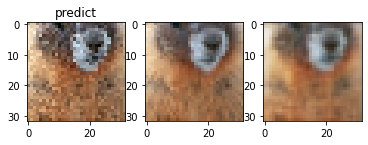

In [17]:
# AFFICHAGE

fig, axs = plt.subplots(1,3)
axs[0].imshow(noisy_imgs [1].permute(1,2,0))
axs[0].set_title('noisy')
axs[1].imshow(clean_imgs[1].permute(1,2,0))
axs[0].set_title('clean')
axs[2].imshow(out[1].permute(1,2,0).detach())
axs[0].set_title('predict')


In [12]:

model = Model()

model.load_pretrained_model()

out = model.predict(noisy_imgs)

img_denoise_psnr = psnr(out ,clean_imgs)

print("psnr", img_denoise_psnr)


psnr tensor(11.6571, grad_fn=<MulBackward0>)
